# Load the training Data
* Set DATA_SMI same as data.ipynb
> This is done to filter generated molecules from trained ones
* Set NB_MOL to the number of expected new molecules 

In [1]:
DATA_SMI     = '/home/ansary/RESEARCH/nCov/pySMD/data/sample_dataset_c_34_128.smi' # @param
with open(DATA_SMI) as f:
    train_smiles = [s.rstrip() for s in f]
NB_MOL=100 # @param

# Load Trained Model
* Download the trained weights from drive and place them in **weights** folder

In [2]:
import os
from coreLib.models import LSTM_Chem,generate
from coreLib.utils import SmilesTokenizer,check_smi
from rdkit import Chem
tokenizer=SmilesTokenizer()
from tqdm.notebook import tqdm

TOKENIZER_TABLE_LEN=len(tokenizer.table)
WEIGHT_PATH=os.path.join(os.getcwd(),'weights','LSTM_CHEM.h5')
model = LSTM_Chem(256,TOKENIZER_TABLE_LEN)
model.load_weights(WEIGHT_PATH)
print('Loaded Model Weights') 


Loaded Model Weights


# Generate New Molecules

In [3]:
new_smiles=[]
print('Generating New Molecules')
for _ in tqdm(range(NB_MOL)):
    smile='G'
    smi=generate(model,smile,tokenizer)
    smi=check_smi(smi)
    if smi is not None and smi not in train_smiles:
        new_smiles.append(smi)


Generating New Molecules


invalid SMILE: Cc1cc(-c2nccc(N3CCC(N(C(=O)NCCCN)C4)C3)c2)cc(C)c1OCC(F)F
invalid SMILE: O=C(O)CCCC(O)CNc1ccc2c(c1)C1(C(=O)Nc3ccc(Cl)cc3)C(CCO)C1C3
invalid SMILE: CCOc1ccc2cc(C(=O)Nc3ccc(F)cc3C)n(Cc3cccc4cc(O)ccc44)cc2c1
invalid SMILE: CC1CC2(O)CC3C4CCCC5(C)C(C(=O)C(C)C)CCC4(C)C3CCC12C
invalid SMILE: CCCCCCCCCCCCC(=O)NCCCCCCCCCn1c(=O)c2c(nc3ccccc13)C(=O)NC(C)C
invalid SMILE: COc1ccc(CCCN2CCc3cc4c(cc3C(CO)C2)cc1
invalid chemistry: Cc1nn(-c2ccccc2)c(-c2ccc(NC(=O)c3ccccc3C(=O)O)cc2)s1
invalid SMILE: COc1ccc(C(=O)Nc2cccc(C(F)(F)F)c2)cc1-c1ccnc2[nH]c(C3CCC(N3CCCCC4)CC3)cc12
invalid SMILE: CC(C)(C)c1ccc(Sc2cc(F)ccc2S(=O)(=O)Nc2ccc(S)N)cc2)cc1
invalid SMILE: CNc1ncnc2c1C(=O)c1c(CCOCCF)cccc1c1-2
invalid chemistry: CCOc1c(Nc2c(C#N)cnc3cc(C(=O)NC4CC4)ccn23)c[nH]c1=O
invalid chemistry: N#Cc1ccc([N+](=O)[O-])sc1NS(=O)(=O)c1cccc(Cl)c1
invalid SMILE: COc1ccc(C(=O)Nc2ccc(Oc3nc(NC(=O)c4cnccc4C)nc3s2CCCC3)cn2)cc1F
invalid chemistry: Cc1cc(NS(=O)(=O)c2ccc(N3CCCCC3)cc2)c2cc(NC(=O)C(C)OC(C)(C)C)cnc2c1=O
inv

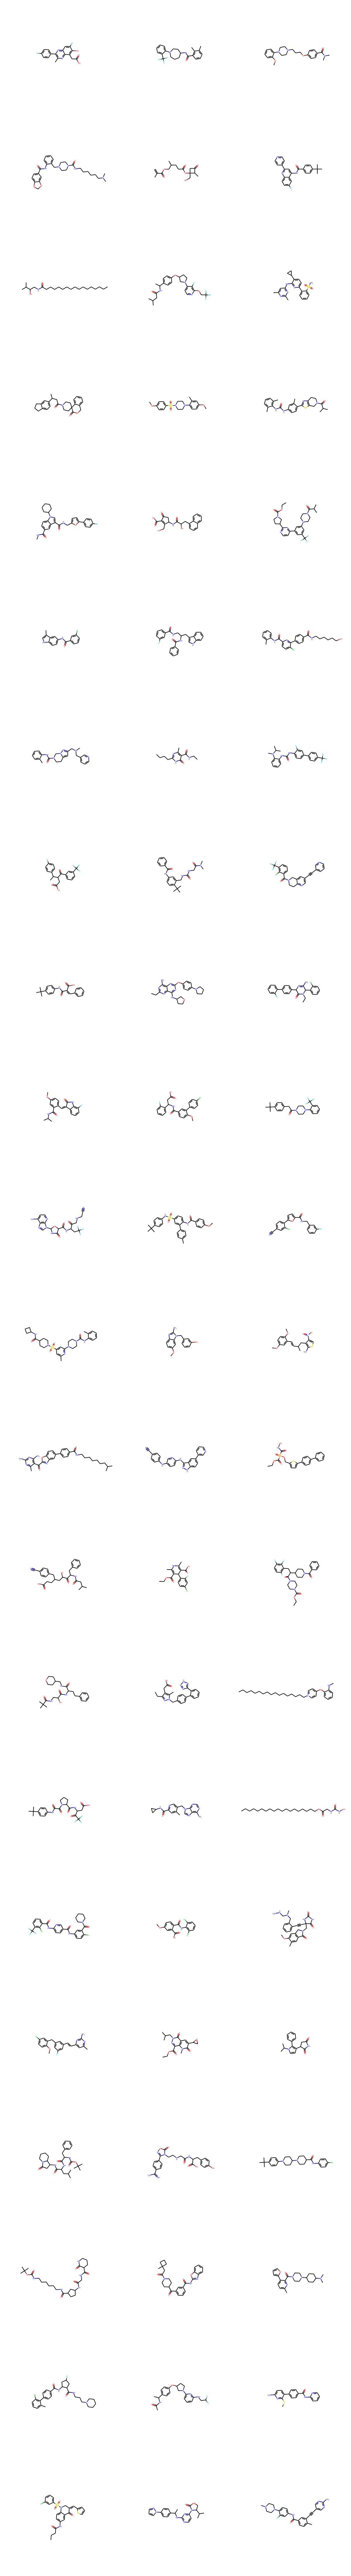

In [4]:
generated = [Chem.MolFromSmiles(x) for x in new_smiles]
Chem.Draw.MolsToGridImage(generated, molsPerRow=3, maxMols=NB_MOL, subImgSize=(400, 400))